In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Tanmay\AppData\Local\Temp\ipykernel_15560\687462750.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


ValueError: Could not interpret value `date` for `x`. An entry with this name does not appear in `data`.

In [ ]:
df1= pd.read_csv("2017PurchasePricesDec.csv")
df2= pd.read_csv("BegInvFINAL12312016.csv")
df3 = pd.read_csv("EndInvFINAL12312016.csv")
df4= pd.read_csv("InvoicePurchases12312016.csv")
df5= pd.read_csv("PurchasesFINAL12312016.csv")
df6= pd.read_csv("SalesFINAL12312016.csv")

df1.head()
df2.head()
df3.head()
df4.head()
df5.head()
df6.head()


,InventoryId,Store,Brand,Description,Size,SalesQuantity,SalesDollars,SalesPrice,SalesDate,Volume,Classification,ExciseTax,VendorNo,VendorName
0,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,1/1/2016,750,1,0.79,12546,JIM BEAM BRANDS COMPANY
1,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,2,32.98,16.49,1/2/2016,750,1,1.57,12546,JIM BEAM BRANDS COMPANY
2,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,1/3/2016,750,1,0.79,12546,JIM BEAM BRANDS COMPANY
3,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,14.49,14.49,1/8/2016,750,1,0.79,12546,JIM BEAM BRANDS COMPANY
4,1_HARDERSFIELD_1005,1,1005,Maker's Mark Combo Pack,375mL 2 Pk,2,69.98,34.99,1/9/2016,375,1,0.79,12546,JIM BEAM BRANDS COMPANY


In [ ]:
# Remove duplicates
df1.drop_duplicates(inplace=True)
df2.drop_duplicates(inplace=True)
df3.drop_duplicates(inplace=True)
df4.drop_duplicates(inplace=True)
df5.drop_duplicates(inplace=True)
df6.drop_duplicates(inplace=True)

In [ ]:
# Handle missing values
df1.fillna(0, inplace=True)
df2.fillna(0, inplace=True)
df3.fillna(0, inplace=True)
df4.fillna(0, inplace=True)
df5.fillna(0, inplace=True)
df6.fillna(0, inplace=True)

In [ ]:
df6['date'] = pd.to_datetime(df6['date'], errors='coerce')

In [ ]:
df1.info()
df2.info()
df3.info()
df4.info()
df5.info()
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12261 entries, 0 to 12260
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Brand           12261 non-null  int64  
 1   Description     12261 non-null  object 
 2   Price           12261 non-null  float64
 3   Size            12261 non-null  object 
 4   Volume          12261 non-null  object 
 5   Classification  12261 non-null  int64  
 6   PurchasePrice   12261 non-null  float64
 7   VendorNumber    12261 non-null  int64  
 8   VendorName      12261 non-null  object 
dtypes: float64(2), int64(3), object(4)
memory usage: 862.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206529 entries, 0 to 206528
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InventoryId  206529 non-null  object 
 1   Store        206529 non-null  int64  
 2   City         206529 non-null  object 
 3   Bra

Exploratory Data Analysis (EDA)

In [ ]:
df6.head()

,InventoryId,Store,Brand,Description,Size,SalesQuantity,SalesDollars,SalesPrice,SalesDate,Volume,Classification,ExciseTax,VendorNo,VendorName
0,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,1/1/2016,750,1,0.79,12546,JIM BEAM BRANDS COMPANY
1,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,2,32.98,16.49,1/2/2016,750,1,1.57,12546,JIM BEAM BRANDS COMPANY
2,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,1/3/2016,750,1,0.79,12546,JIM BEAM BRANDS COMPANY
3,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,14.49,14.49,1/8/2016,750,1,0.79,12546,JIM BEAM BRANDS COMPANY
4,1_HARDERSFIELD_1005,1,1005,Maker's Mark Combo Pack,375mL 2 Pk,2,69.98,34.99,1/9/2016,375,1,0.79,12546,JIM BEAM BRANDS COMPANY


In [ ]:
# Example EDA: Inventory Levels Over Time
# Example EDA: Sales Quantity Over Time by Brand
plt.figure(figsize=(12, 6))
sns.lineplot(data=df6, x='SalesDate', y='SalesQuantity', hue='Brand')
plt.title('Sales Quantity Over Time by Brand')
plt.xlabel('Date')
plt.ylabel('Sales Quantity')
plt.show()

In [30]:
df6.columns

Index(['InventoryId', 'Store', 'Brand', 'Description', 'Size', 'SalesQuantity',
       'SalesDollars', 'SalesPrice', 'SalesDate', 'Volume', 'Classification',
       'ExciseTax', 'VendorNo', 'VendorName'],
      dtype='object')

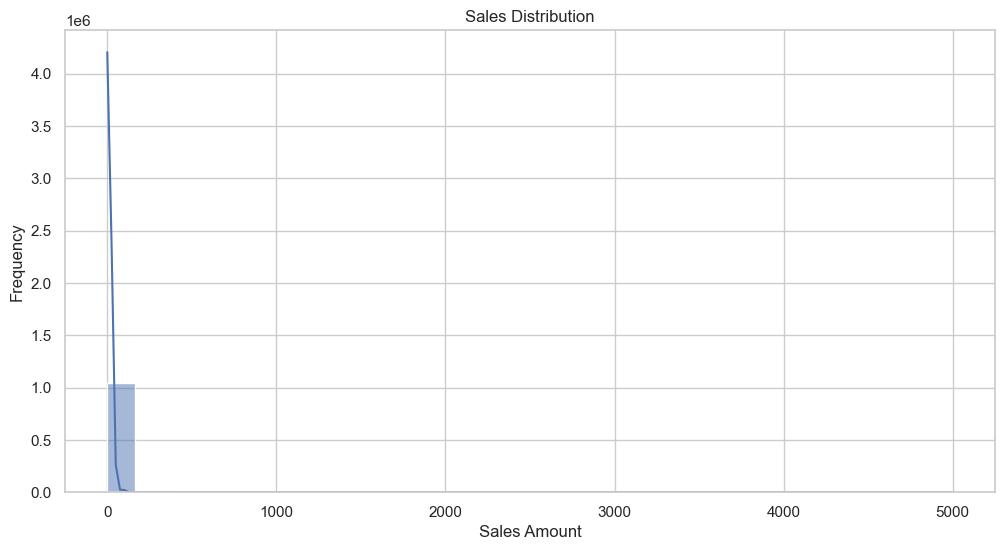

In [33]:
# Sales Distribution
plt.figure(figsize=(12, 6))
sns.histplot(data=df6, x='SalesPrice', bins=30, kde=True)
plt.title('Sales Distribution')
plt.xlabel('Sales Amount')
plt.ylabel('Frequency')
plt.show()

In [34]:
df5.shape

(2372474, 16)

In [35]:
df1.head()

,Brand,Description,Price,Size,Volume,Classification,PurchasePrice,VendorNumber,VendorName
0,58,Gekkeikan Black & Gold Sake,12.99,750mL,750,1,9.28,8320,SHAW ROSS INT L IMP LTD
1,62,Herradura Silver Tequila,36.99,750mL,750,1,28.67,1128,BROWN-FORMAN CORP
2,63,Herradura Reposado Tequila,38.99,750mL,750,1,30.46,1128,BROWN-FORMAN CORP
3,72,No. 3 London Dry Gin,34.99,750mL,750,1,26.11,9165,ULTRA BEVERAGE COMPANY LLP
4,75,Three Olives Tomato Vodka,14.99,750mL,750,1,10.94,7245,PROXIMO SPIRITS INC.


In [36]:
df1.columns

Index(['Brand', 'Description', 'Price', 'Size', 'Volume', 'Classification',
       'PurchasePrice', 'VendorNumber', 'VendorName'],
      dtype='object')

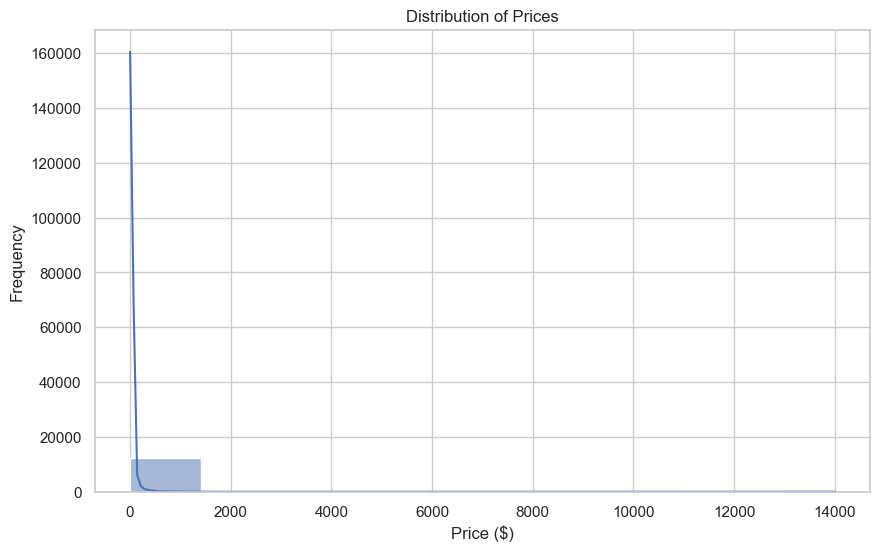

In [37]:
# Visualize distribution of prices
plt.figure(figsize=(10, 6))
sns.histplot(data=df1, x='Price', bins=10, kde=True)
plt.title('Distribution of Prices')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.show()

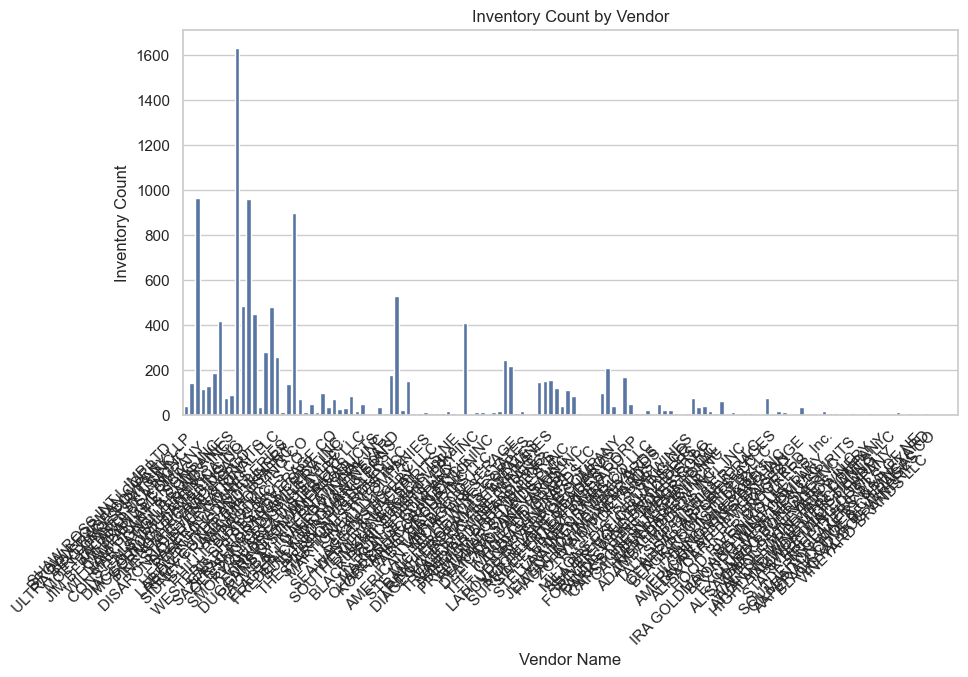

In [40]:
# Analyze vendors and their corresponding inventory counts
plt.figure(figsize=(10, 5))
sns.countplot(data=df1, x='VendorName')
plt.xticks(rotation=45, ha='right')
plt.title('Inventory Count by Vendor')
plt.xlabel('Vendor Name')
plt.ylabel('Inventory Count')
plt.show()

In [42]:
df2.head()

,InventoryId,Store,City,Brand,Description,Size,onHand,Price,startDate
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,8,12.99,2016-01-01
1,1_HARDERSFIELD_60,1,HARDERSFIELD,60,Canadian Club 1858 VAP,750mL,7,10.99,2016-01-01
2,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,6,36.99,2016-01-01
3,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,3,38.99,2016-01-01
4,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,750mL,6,34.99,2016-01-01


In [44]:
# Analyze inventory distribution by brand
plt.figure(figsize=(10, 6))
sns.countplot(data=df2, x='Brand')
plt.title('Inventory Distribution by Brand')
plt.xlabel('Brand')
plt.ylabel('Inventory Count')
plt.show()

In [ ]:
# Visualize total inventory value by brand
plt.figure(figsize=(10, 6))
sns.barplot(data=df2, x='Brand', y='TotalValue')
plt.title('Total Inventory Value by Brand')
plt.xlabel('Brand')
plt.ylabel('Total Inventory Value ($)')
plt.show()